In [6]:
import numpy as np
import matplotlib.pyplot as plt

print('Reading...')

Il_fal_q = np.loadtxt('lte_fal_q')
Il_fal_f = np.loadtxt('lte_fal_f')

In_fal_q = np.loadtxt('nlte_fal_q')
In_fal_f = np.loadtxt('nlte_fal_f')

Il_kur_q = np.loadtxt('lte_kur_q')
Il_kur_f = np.loadtxt('lte_kur_f')

In_kur_q = np.loadtxt('nlte_kur_q')
In_kur_f = np.loadtxt('nlte_kur_f')

#I0l = np.loadtxt('./spec/123_lte.spec', unpack = True)
#ISl = np.loadtxt('./spec/186_lte.spec', unpack = True)
#I3l = np.loadtxt('./spec/118_lte.spec', unpack = True)

#I0n = np.loadtxt('./spec/123_nlte.spec', unpack = True)
#ISn = np.loadtxt('./spec/186_nlte.spec', unpack = True)
#I3n = np.loadtxt('./spec/118_nlte.spec', unpack = True)

#np.savez('specs', I0l = I0l, ISl = ISl, I3l = I3l, I0n = I0n, ISn = ISn, I3n = I3n)

print('Loading...')

I0l_f = np.load('specs_3D.npz')['I0l'].reshape(512 * 512, 120)
ISl_f = np.load('specs_3D.npz')['ISl'].reshape(512 * 512, 120)
I3l_f = np.load('specs_3D.npz')['I3l'].reshape(512 * 512, 120)
I0n_f = np.load('specs_3D.npz')['I0n'].reshape(512 * 512, 120)
ISn_f = np.load('specs_3D.npz')['ISn'].reshape(512 * 512, 120)
I3n_f = np.load('specs_3D.npz')['I3n'].reshape(512 * 512, 120)

w = np.arange(1805, 3005, 10) / 10

#ns0l = int(len(I0l_f) / 120)
#nsSl = int(len(ISl_f) / 120)
#ns3l = int(len(I3l_f) / 120)
#ns0n = int(len(I0n_f) / 120)
#nsSn = int(len(ISn_f) / 120)
#ns3n = int(len(I3n_f) / 120)

ns0l = 512 * 512
nsSl = 512 * 512
ns3l = 512 * 512
ns0n = 512 * 512
nsSn = 512 * 512
ns3n = 512 * 512

print('Reshaping...')

#I0l = I0l_f.reshape(ns0l, 120)
#ISl = ISl_f.reshape(nsSl, 120)
#I3l = I3l_f.reshape(ns3l, 120)
#I0n = I0n_f.reshape(ns0n, 120)
#ISn = ISn_f.reshape(nsSn, 120)
#I3n = I3n_f.reshape(ns3n, 120)

I0l = I0l_f
ISl = ISl_f
I3l = I3l_f
I0n = I0n_f
ISn = ISn_f
I3n = I3n_f

I0l_m = np.zeros(120)
ISl_m = np.zeros(120)
I3l_m = np.zeros(120)
I0n_m = np.zeros(120)
ISn_m = np.zeros(120)
I3n_m = np.zeros(120)

print('Averaging...')

for i in range(120):
    
    I0l_m[i] = np.mean(I0l[:, i])
    ISl_m[i] = np.mean(ISl[:, i])
    I3l_m[i] = np.mean(I3l[:, i])
    I0n_m[i] = np.mean(I0n[:, i])
    ISn_m[i] = np.mean(ISn[:, i])
    I3n_m[i] = np.mean(I3n[:, i])

np.savetxt('mean_intensity.dat', \
           np.column_stack([w, I0l_m, ISl_m, I3l_m, I0n_m, ISn_m, I3n_m]), \
           fmt = ('%7.5e', '%7.5e', '%7.5e', '%7.5e', '%7.5e', '%7.5e', '%7.5e'), delimiter = '  ')

Reading...
Loading...
Reshaping...
Averaging...


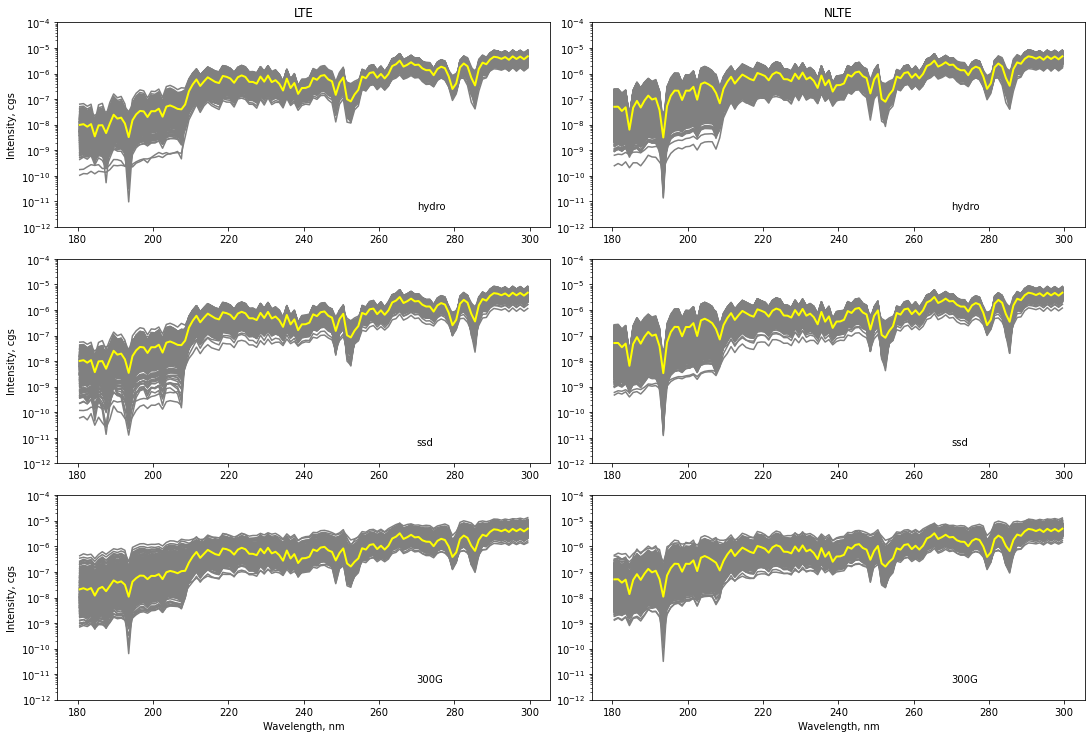

In [7]:
import itertools

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))

fig.tight_layout()

for i in range(0, ns0l, 400): ax[0, 0].plot(w, I0l[i, :], color = 'gray')
for i in range(0, ns0n, 400): ax[0, 1].plot(w, I0n[i, :], color = 'gray')
for i in range(0, nsSl, 400): ax[1, 0].plot(w, ISl[i, :], color = 'gray')
for i in range(0, nsSn, 400): ax[1, 1].plot(w, ISn[i, :], color = 'gray')
for i in range(0, ns3l, 400): ax[2, 0].plot(w, I3l[i, :], color = 'gray')
for i in range(0, ns3n, 400): ax[2, 1].plot(w, I3n[i, :], color = 'gray')

ax[0, 0].plot(w, I0l_m, linewidth = 2, color = 'yellow')
ax[0, 1].plot(w, I0n_m, linewidth = 2, color = 'yellow')
ax[1, 0].plot(w, ISl_m, linewidth = 2, color = 'yellow')
ax[1, 1].plot(w, ISn_m, linewidth = 2, color = 'yellow')
ax[2, 0].plot(w, I3l_m, linewidth = 2, color = 'yellow')
ax[2, 1].plot(w, I3n_m, linewidth = 2, color = 'yellow')

ax[0, 0].set_title('LTE')
ax[0, 1].set_title('NLTE')

ax[0, 0].text(270, 5e-12, 'hydro')
ax[0, 1].text(270, 5e-12, 'hydro')
ax[1, 0].text(270, 5e-12, 'ssd')
ax[1, 1].text(270, 5e-12, 'ssd')
ax[2, 0].text(270, 5e-12, '300G')
ax[2, 1].text(270, 5e-12, '300G')

ax[2, 0].set_xlabel('Wavelength, nm')
ax[2, 1].set_xlabel('Wavelength, nm')
ax[0, 0].set_ylabel('Intensity, cgs')
ax[1, 0].set_ylabel('Intensity, cgs')
ax[2, 0].set_ylabel('Intensity, cgs')

for i, j in itertools.product(range(3), range(2)):

    ax[i, j].set_yscale('log')
    ax[i, j].set_ylim(1e-12, 1e-4)

plt.savefig('allrays.pdf', bbox_inches = 'tight')

plt.show()

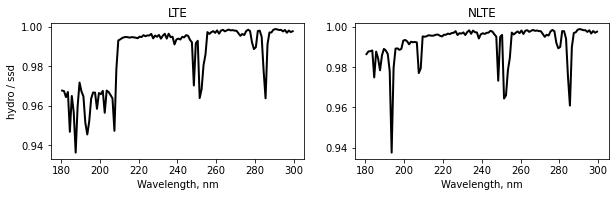

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 2.5))

ax[0].plot(w, I0l_m / ISl_m, linewidth = 2, color = 'black')
ax[1].plot(w, I0n_m / ISn_m, linewidth = 2, color = 'black')

ax[0].set_title('LTE')
ax[1].set_title('NLTE')

ax[0].set_xlabel('Wavelength, nm')
ax[1].set_xlabel('Wavelength, nm')
ax[0].set_ylabel('hydro / ssd')

plt.savefig('hydro_to_ssd.pdf', bbox_inches = 'tight')

plt.show()

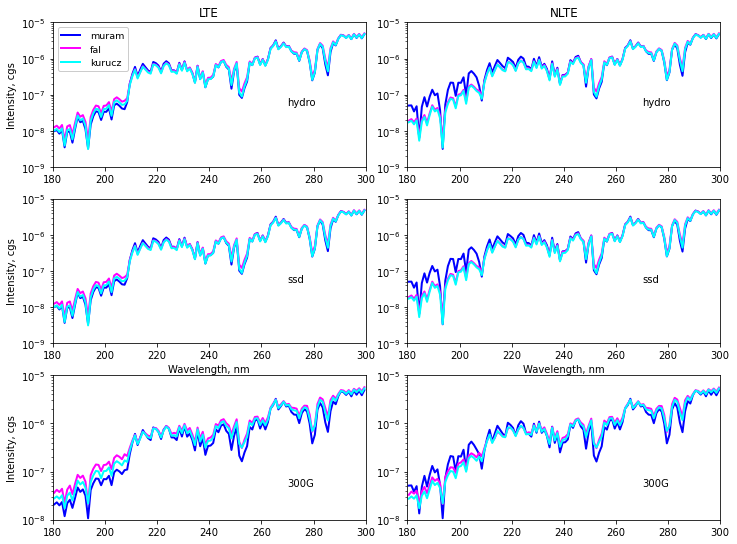

In [9]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 7.5))

fig.tight_layout()

ax[0, 0].plot(w, I0l_m,    linewidth = 2, color = 'blue',    label = 'muram')
ax[0, 0].plot(w, Il_fal_q, linewidth = 2, color = 'magenta', label = 'fal')
ax[0, 0].plot(w, Il_kur_q, linewidth = 2, color = 'cyan',    label = 'kurucz')

ax[0, 1].plot(w, I0n_m,    linewidth = 2, color = 'blue',    label = 'muram')
ax[0, 1].plot(w, In_fal_q, linewidth = 2, color = 'magenta', label = 'fal')
ax[0, 1].plot(w, In_kur_q, linewidth = 2, color = 'cyan',    label = 'kurucz')

ax[1, 0].plot(w, ISl_m,    linewidth = 2, color = 'blue',    label = 'muram')
ax[1, 0].plot(w, Il_fal_q, linewidth = 2, color = 'magenta', label = 'fal')
ax[1, 0].plot(w, Il_kur_q, linewidth = 2, color = 'cyan',    label = 'kurucz')

ax[1, 1].plot(w, ISn_m,    linewidth = 2, color = 'blue',    label = 'muram')
ax[1, 1].plot(w, In_fal_q, linewidth = 2, color = 'magenta', label = 'fal')
ax[1, 1].plot(w, In_kur_q, linewidth = 2, color = 'cyan',    label = 'kurucz')

ax[2, 0].plot(w, I3l_m,    linewidth = 2, color = 'blue',    label = 'muram')
ax[2, 0].plot(w, Il_fal_f, linewidth = 2, color = 'magenta', label = 'fal')
ax[2, 0].plot(w, Il_kur_f, linewidth = 2, color = 'cyan',    label = 'kurucz')

ax[2, 1].plot(w, I3n_m,    linewidth = 2, color = 'blue',    label = 'muram')
ax[2, 1].plot(w, In_fal_f, linewidth = 2, color = 'magenta', label = 'fal')
ax[2, 1].plot(w, In_kur_f, linewidth = 2, color = 'cyan',    label = 'kurucz')

ax[0, 0].set_title('LTE')
ax[0, 1].set_title('NLTE')

ax[0, 0].text(270, 5e-8, 'hydro')
ax[0, 1].text(270, 5e-8, 'hydro')
ax[1, 0].text(270, 5e-8, 'ssd')
ax[1, 1].text(270, 5e-8, 'ssd')
ax[2, 0].text(270, 5e-8, '300G')
ax[2, 1].text(270, 5e-8, '300G')

ax[1, 0].set_xlabel('Wavelength, nm')
ax[1, 1].set_xlabel('Wavelength, nm')
ax[0, 0].set_ylabel('Intensity, cgs')
ax[1, 0].set_ylabel('Intensity, cgs')
ax[2, 0].set_ylabel('Intensity, cgs')

for i, j in itertools.product(range(3), range(2)): 
    
    ax[i, j].set_yscale('log')

ax[0, 0].set_ylim(1e-9, 1e-5)
ax[0, 1].set_ylim(1e-9, 1e-5)
ax[1, 0].set_ylim(1e-9, 1e-5)
ax[1, 1].set_ylim(1e-9, 1e-5)
ax[2, 0].set_ylim(1e-8, 1e-5)
ax[2, 1].set_ylim(1e-8, 1e-5)

#ax[0, 0].set_ylim(1e-9, 6e-6)
#ax[0, 1].set_ylim(1e-9, 6e-6)
#ax[1, 0].set_ylim(1e-8, 6e-6)
#ax[1, 1].set_ylim(1e-8, 6e-6)

ax[0, 0].set_xlim(180, 300)
ax[0, 1].set_xlim(180, 300)
ax[1, 0].set_xlim(180, 300)
ax[1, 1].set_xlim(180, 300)
ax[2, 0].set_xlim(180, 300)
ax[2, 1].set_xlim(180, 300)

leg = ax[0, 0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 9.5})

plt.savefig('models_comp.pdf', bbox_inches = 'tight')

plt.show()

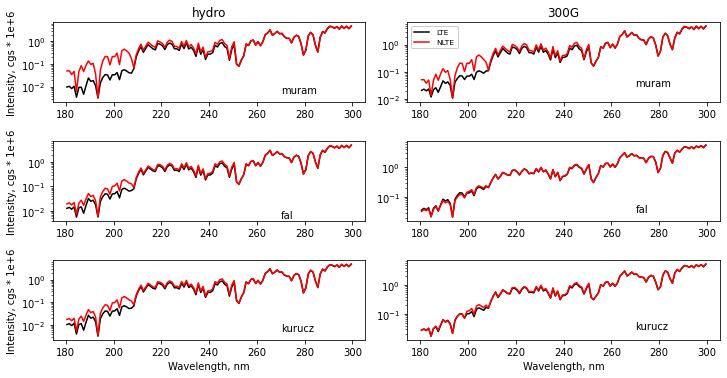

In [10]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 5))

fig.tight_layout()

plt.subplots_adjust(hspace = 0.5)

ax[0, 0].plot(w, I0l_m * 1e+6, color = 'k', label = 'LTE')
ax[0, 0].plot(w, I0n_m * 1e+6, color = 'r', label = 'NLTE')
ax[0, 1].plot(w, I3l_m * 1e+6, color = 'k', label = 'LTE')
ax[0, 1].plot(w, I3n_m * 1e+6, color = 'r', label = 'NLTE')

ax[1, 0].plot(w, Il_fal_q * 1e+6, color = 'k', label = 'LTE')
ax[1, 0].plot(w, In_fal_q * 1e+6, color = 'r', label = 'NLTE')
ax[1, 1].plot(w, Il_fal_f * 1e+6, color = 'k', label = 'LTE')
ax[1, 1].plot(w, In_fal_f * 1e+6, color = 'r', label = 'NLTE')

ax[2, 0].plot(w, Il_kur_q * 1e+6, color = 'k', label = 'LTE')
ax[2, 0].plot(w, In_kur_q * 1e+6, color = 'r', label = 'NLTE')
ax[2, 1].plot(w, Il_kur_f * 1e+6, color = 'k', label = 'LTE')
ax[2, 1].plot(w, In_kur_f * 1e+6, color = 'r', label = 'NLTE')

ax[0, 0].set_title('hydro')
ax[0, 1].set_title('300G')

ax[2, 0].set_xlabel('Wavelength, nm')
ax[2, 1].set_xlabel('Wavelength, nm')
ax[0, 0].set_ylabel('Intensity, cgs * 1e+6')
ax[1, 0].set_ylabel('Intensity, cgs * 1e+6')
ax[2, 0].set_ylabel('Intensity, cgs * 1e+6')

ax[0, 0].text(270, 5e-3, 'muram')
ax[0, 1].text(270, 3e-2, 'muram')
ax[1, 0].text(270, 5e-3, 'fal')
ax[1, 1].text(270, 3e-2, 'fal')
ax[2, 0].text(270, 5e-3, 'kurucz')
ax[2, 1].text(270, 3e-2, 'kurucz')

for i, j in itertools.product(range(3), range(2)): 
    
    ax[i, j].set_yscale('log')

leg = ax[0, 1].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 7.5})

plt.savefig('nlte_lte_comp.pdf', bbox_inches = 'tight')

plt.show()

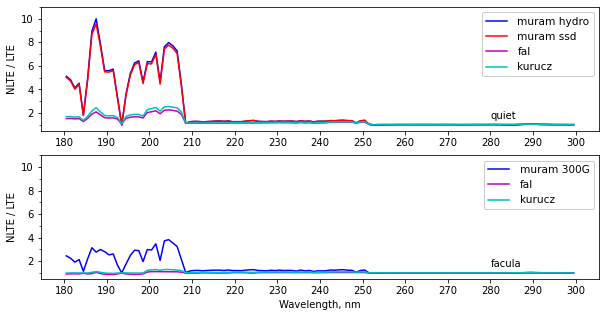

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 5))

#fig.suptitle('Ratio of averaged intensities', fontsize = 15)

ax[0].plot(w, I0n_m / I0l_m,       color = 'b', label = 'muram hydro')
ax[0].plot(w, ISn_m / ISl_m,       color = 'r', label = 'muram ssd')
ax[0].plot(w, In_fal_q / Il_fal_q, color = 'm', label = 'fal')
ax[0].plot(w, In_kur_q / Il_kur_q, color = 'c', label = 'kurucz')

ax[1].plot(w, I3n_m / I3l_m,       color = 'b', label = 'muram 300G')
ax[1].plot(w, In_fal_f / Il_fal_f, color = 'm', label = 'fal')
ax[1].plot(w, In_kur_f / Il_kur_f, color = 'c', label = 'kurucz')

ax[0].xaxis.set_major_locator(MultipleLocator(10))
ax[0].yaxis.set_minor_locator(MultipleLocator(1))
ax[1].xaxis.set_major_locator(MultipleLocator(10))
ax[1].yaxis.set_minor_locator(MultipleLocator(1))

ax[0].set_ylim(0.5, 11)
ax[1].set_ylim(0.5, 11)

ax[1].set_xlabel('Wavelength, nm')
ax[0].set_ylabel('NLTE / LTE')
ax[1].set_ylabel('NLTE / LTE')

ax[0].text(280, 1.5, 'quiet')
ax[1].text(280, 1.5, 'facula')

leg = ax[0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 10.5})
leg = ax[1].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 10.5})

plt.savefig('nlte_lte_ratio.pdf', bbox_inches = 'tight')

plt.show()

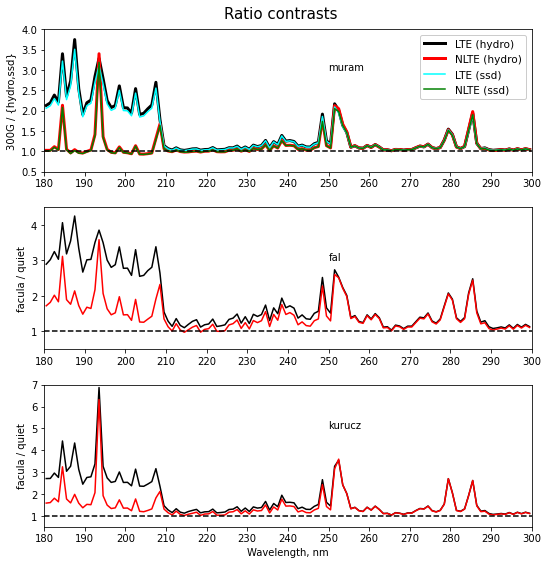

In [12]:
rcontr_n = I3n_m / I0n_m
rcontr_l = I3l_m / I0l_m

rcontr_n_ssd = I3n_m / ISn_m
rcontr_l_ssd = I3l_m / ISl_m

rcontr_n_fal = In_fal_f / In_fal_q
rcontr_l_fal = Il_fal_f / Il_fal_q

rcontr_n_kur = In_kur_f / In_kur_q
rcontr_l_kur = Il_kur_f / Il_kur_q

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (7.5, 7.5))

fig.tight_layout()

plt.subplots_adjust(hspace = 0.25)

fig.suptitle('Ratio contrasts', fontsize = 15, y = 1.015)

ax[0].plot(w, rcontr_l, color ='k', label = 'LTE (hydro)', linewidth = 3)
ax[0].plot(w, rcontr_n, color ='r', label = 'NLTE (hydro)', linewidth = 3)

ax[0].plot(w, rcontr_l_ssd, color ='cyan',   label = 'LTE (ssd)')
ax[0].plot(w, rcontr_n_ssd, color ='green', label = 'NLTE (ssd)')

ax[1].plot(w, rcontr_l_fal, color ='k', label = 'LTE')
ax[1].plot(w, rcontr_n_fal, color ='r', label = 'NLTE')

ax[2].plot(w, rcontr_l_kur, color ='k', label = 'LTE')
ax[2].plot(w, rcontr_n_kur, color ='r', label = 'NLTE')

ax[0].axhline(y = 1.0, color = 'k', linestyle = '--')
ax[1].axhline(y = 1.0, color = 'k', linestyle = '--')
ax[2].axhline(y = 1.0, color = 'k', linestyle = '--')

ax[2].set_xlabel('Wavelength, nm')
ax[0].set_ylabel('300G / {hydro,ssd}')
ax[1].set_ylabel('facula / quiet')
ax[2].set_ylabel('facula / quiet')

ax[0].set_ylim(0.5, 4.0)
ax[1].set_ylim(0.5, 4.5)
ax[2].set_ylim(0.5, 7.0)

#ax[0].set_ylim(1.0, 3.0)
#ax[1].set_ylim(1.0, 3.5)
#ax[2].set_ylim(1.0, 4.0)

ax[0].set_xlim(180, 300)
ax[1].set_xlim(180, 300)
ax[2].set_xlim(180, 300)

ax[0].xaxis.set_major_locator(MultipleLocator(10))
ax[1].xaxis.set_major_locator(MultipleLocator(10))
ax[2].xaxis.set_major_locator(MultipleLocator(10))

ax[0].text(250, 3.0, 'muram')
ax[1].text(250, 3.0, 'fal')
ax[2].text(250, 5.0, 'kurucz')

leg = ax[0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 10.5})

plt.savefig('ratio_contrasts.pdf', bbox_inches = 'tight')

plt.show()

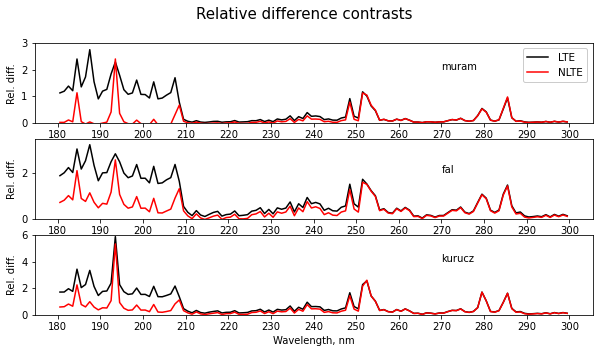

In [13]:
dcontr_n = (I3n_m - I0n_m) / I0n_m
dcontr_l = (I3l_m - I0l_m) / I0l_m

dcontr_n_fal = (In_fal_f - In_fal_q) / In_fal_q
dcontr_l_fal = (Il_fal_f - Il_fal_q) / Il_fal_q

dcontr_n_kur = (In_kur_f - In_kur_q) / In_kur_q
dcontr_l_kur = (Il_kur_f - Il_kur_q) / Il_kur_q

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 5))

fig.suptitle('Relative difference contrasts', fontsize = 15)

ax[0].plot(w, dcontr_l, color ='k', label = 'LTE')
ax[0].plot(w, dcontr_n, color ='r', label = 'NLTE')

ax[1].plot(w, dcontr_l_fal, color ='k', label = 'LTE')
ax[1].plot(w, dcontr_n_fal, color ='r', label = 'NLTE')

ax[2].plot(w, dcontr_l_kur, color ='k', label = 'LTE')
ax[2].plot(w, dcontr_n_kur, color ='r', label = 'NLTE')

ax[2].set_xlabel('Wavelength, nm')
ax[0].set_ylabel('Rel. diff.')
ax[1].set_ylabel('Rel. diff.')
ax[2].set_ylabel('Rel. diff.')

ax[0].set_ylim(0.0, 3.0)
ax[1].set_ylim(0.0, 3.5)
ax[2].set_ylim(0.0, 6.0)

ax[0].xaxis.set_major_locator(MultipleLocator(10))
ax[1].xaxis.set_major_locator(MultipleLocator(10))
ax[2].xaxis.set_major_locator(MultipleLocator(10))

ax[0].text(270, 2.0, 'muram')
ax[1].text(270, 2.0, 'fal')
ax[2].text(270, 4.0, 'kurucz')

leg = ax[0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 10.5})

plt.savefig('nlte_lte_rel_diff_cont.pdf', bbox_inches = 'tight')

plt.show()

In [14]:
import os

from tqdm import tqdm

#for i in range(120):
for i in tqdm(range(120)):
#for i in tqdm(range(5)):

    nbins0 = 200
    
    lrange0 = max(np.max(I0l[:, i]), np.max(I0n[:, i]))
    lrange3 = max(np.max(I3l[:, i]), np.max(I3n[:, i]))

    factor =  lrange3 / lrange0

    nbins3 = nbins0 * int(round(factor))

    lbin0 = lrange0 / nbins0
    lbin3 = lrange3 / nbins3
    
    #print(w[i], lbin3, lbin0, np.abs((lbin3 - lbin0)) * 100 / lbin0)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
    
    fig.suptitle(str(w[i]) + ' nm', fontsize = 12)

    ax[0].hist(I0l[:, i] * 1e+6, bins = nbins0, density = True, color = 'k', histtype='step', label = 'LTE')
    ax[0].hist(I0n[:, i] * 1e+6, bins = nbins0, density = True, color = 'r', histtype='step', label = 'NLTE')

    ax[1].hist(I3l[:, i] * 1e+6, bins = nbins3, density = True, color = 'k', histtype='step', label = 'LTE')
    ax[1].hist(I3n[:, i] * 1e+6, bins = nbins3, density = True, color = 'r', histtype='step', label = 'NLTE')
    
    xmin, xmax = ax[0].get_xlim()
    
    ax[1].set_xlim(xmin, xmax)
    
    ymin, ymax = ax[1].get_ylim()
    
    ax[0].set_ylim(ymin, ymax)
    
    ax[0].set_title('hydro')
    ax[1].set_title('300G')
    
    ax[0].set_xlabel('Intensity, cgs * 1e+6')
    ax[1].set_xlabel('Intensity, cgs * 1e+6')
    #ax[0].set_ylabel('Number')
    ax[0].set_ylabel('Number / Area')
    
    leg = ax[1].legend(framealpha = 1, loc = 0, handletextpad = 1, prop = {'size': 10.5})

    plt.savefig('./fig/' + str(i) + '.pdf', bbox_inches = 'tight')
    
    plt.close('all')

s = ""

for i in range(120):
#for i in range(5):

    s += './fig/' + str(i) + '.pdf '

os.system('pdftk ' + s + 'output ' + 'hist.pdf')

#plt.show()

100%|██████████| 120/120 [01:00<00:00,  2.04it/s]


0

1.5658620666666668e-06 1.528990625e-06 2.4114890610703825


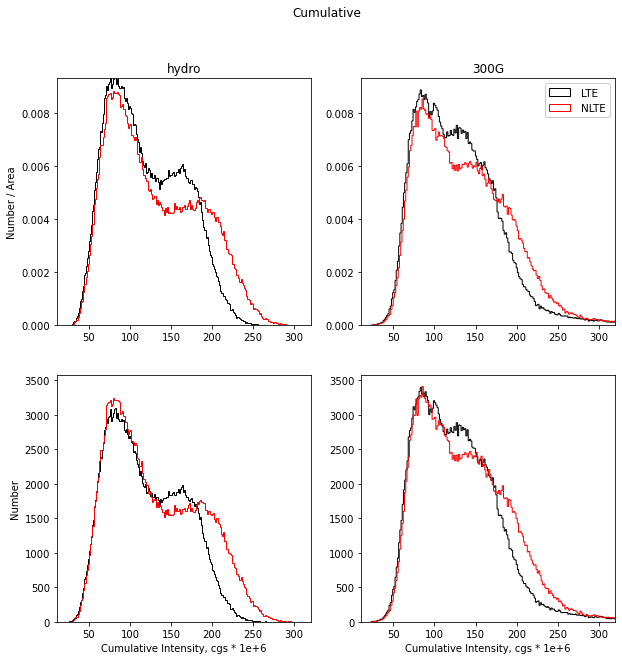

In [15]:
I0l_b = np.zeros(ns0l)
I0n_b = np.zeros(ns0n)
I3l_b = np.zeros(ns3l)
I3n_b = np.zeros(ns3n)

for i in range(ns0l): I0l_b[i] = np.sum(I0l[i, :])
for i in range(ns0n): I0n_b[i] = np.sum(I0n[i, :])
for i in range(ns3l): I3l_b[i] = np.sum(I3l[i, :])
for i in range(ns3n): I3n_b[i] = np.sum(I3n[i, :])

nbins0 = 200
    
lrange0 = max(np.max(I0l_b), np.max(I0n_b))    
lrange3 = max(np.max(I3l_b), np.max(I3n_b))
    
factor =  lrange3 / lrange0
    
nbins3 = nbins0 * int(round(factor))
    
lbin0 = lrange0 / nbins0
lbin3 = lrange3 / nbins3
    
print(lbin3, lbin0, np.abs((lbin3 - lbin0)) * 100 / lbin0)
    
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
    
fig.suptitle('Cumulative', fontsize = 12)

ax[0, 0].hist(I0l_b * 1e+6, bins = nbins0, density = True, color = 'k', histtype='step', label = 'LTE')
ax[0, 0].hist(I0n_b * 1e+6, bins = nbins0, density = True, color = 'r', histtype='step', label = 'NLTE')

ax[0, 1].hist(I3l_b * 1e+6, bins = nbins3, density = True, color = 'k', histtype='step', label = 'LTE')
ax[0, 1].hist(I3n_b * 1e+6, bins = nbins3, density = True, color = 'r', histtype='step', label = 'NLTE')

ax[1, 0].hist(I0l_b * 1e+6, bins = nbins0, color = 'k', histtype='step', label = 'LTE')
ax[1, 0].hist(I0n_b * 1e+6, bins = nbins0, color = 'r', histtype='step', label = 'NLTE')

ax[1, 1].hist(I3l_b * 1e+6, bins = nbins3, color = 'k', histtype='step', label = 'LTE')
ax[1, 1].hist(I3n_b * 1e+6, bins = nbins3, color = 'r', histtype='step', label = 'NLTE')
    
xmin, xmax = ax[0, 0].get_xlim()
    
ax[0, 1].set_xlim(xmin, xmax)
    
ymin, ymax = ax[0, 1].get_ylim()
    
ax[0, 0].set_ylim(ymin, ymax)

xmin, xmax = ax[1, 0].get_xlim()
    
ax[1, 1].set_xlim(xmin, xmax)
    
ymin, ymax = ax[1, 1].get_ylim()
    
ax[1, 0].set_ylim(ymin, ymax)
    
ax[0, 0].set_title('hydro')
ax[0, 1].set_title('300G')
    
ax[1, 0].set_xlabel('Cumulative Intensity, cgs * 1e+6')
ax[1, 1].set_xlabel('Cumulative Intensity, cgs * 1e+6')
ax[0, 0].set_ylabel('Number / Area')
ax[1, 0].set_ylabel('Number')
    
leg = ax[0, 1].legend(framealpha = 1, loc = 0, handletextpad = 1, prop = {'size': 10.5})

plt.savefig('cumulative_hist.pdf', bbox_inches = 'tight')

plt.show()

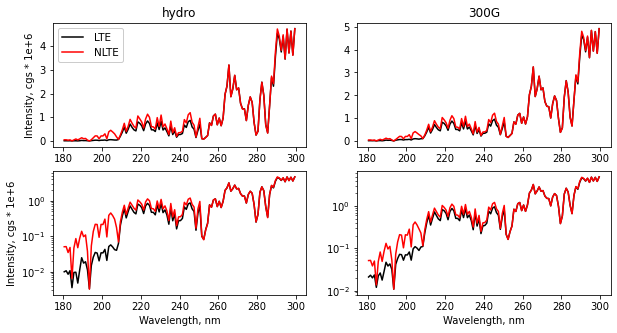

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))

ax[0, 0].plot(w, I0l_m * 1e+6, color = 'k', label = 'LTE')
ax[0, 0].plot(w, I0n_m * 1e+6, color = 'r', label = 'NLTE')

ax[0, 1].plot(w, I3l_m * 1e+6, color = 'k', label = 'LTE')
ax[0, 1].plot(w, I3n_m * 1e+6, color = 'r', label = 'NLTE')

ax[1, 0].plot(w, I0l_m * 1e+6, color = 'k', label = 'LTE')
ax[1, 0].plot(w, I0n_m * 1e+6, color = 'r', label = 'NLTE')

ax[1, 1].plot(w, I3l_m * 1e+6, color = 'k', label = 'LTE')
ax[1, 1].plot(w, I3n_m * 1e+6, color = 'r', label = 'NLTE')

ax[0, 0].set_title('hydro')
ax[0, 1].set_title('300G')

ax[1, 0].set_xlabel('Wavelength, nm')
ax[1, 1].set_xlabel('Wavelength, nm')
ax[0, 0].set_ylabel('Intensity, cgs * 1e+6')
ax[1, 0].set_ylabel('Intensity, cgs * 1e+6')

ax[1, 0].set_yscale('log')
ax[1, 1].set_yscale('log')

leg = ax[0, 0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})

plt.show()

In [18]:
import os.path

def check_zeros(arr):
    
    for i in range(512):
    
        for j in range(512):
        
            non_zero_number = np.count_nonzero(arr[i, j, :])
        
            if non_zero_number != 120:
            
                print(i, j)

def num_lines(f):
    
    return sum(1 for line in open(f))

def read_cube(directory):
    
    I = np.zeros((512, 512, 120))
    
    for i in tqdm(range(512)):
    
        for j in range(512):
        
            f = directory + str(i + 1) + '.' + str(j + 1)
        
            if (os.path.exists(f) and num_lines(f) == 120):
            
                I[i, j, :] = np.loadtxt(f)

            else:
                
                #if np.count_nonzero(I[i, j - 1, :]) == 120:
                
                 #   I[i, j, :] = I[i, j - 1, :]
                    
                #else:
                
                if i != 0:
                    
                    I[i, j, :] = I[i - 1, j, :]
                    
                else:
                    
                    I[i, j, :] = I[i, j - 1, :]
    
    return I

#I0l = read_cube('./spec/123_lte/')
#ISl = read_cube('./spec/186_lte/')
#I3l = read_cube('./spec/118_lte/')
#I0n = read_cube('./spec/123_nlte/')
#ISn = read_cube('./spec/186_nlte/')
#I3n = read_cube('./spec/118_nlte/')

#np.savez('specs_3D', I0l = I0l, ISl = ISl, I3l = I3l, I0n = I0n, ISn = ISn, I3n = I3n)

#I0l = np.load('specs_3D.npz')['I0l'] * 1e+6
#ISl = np.load('specs_3D.npz')['ISl'] * 1e+6
#I3l = np.load('specs_3D.npz')['I3l'] * 1e+6
#I0n = np.load('specs_3D.npz')['I0n'] * 1e+6
#ISn = np.load('specs_3D.npz')['ISn'] * 1e+6
#I3n = np.load('specs_3D.npz')['I3n'] * 1e+6

I0l = np.load('specs_3D.npz')['I0l']
ISl = np.load('specs_3D.npz')['ISl']
I3l = np.load('specs_3D.npz')['I3l']
I0n = np.load('specs_3D.npz')['I0n']
ISn = np.load('specs_3D.npz')['ISn']
I3n = np.load('specs_3D.npz')['I3n']

print('checking I0l')
check_zeros(I0l)
print('checking ISl')
check_zeros(ISl)
print('checking I3l')
check_zeros(I3l)

print('checking I0n')
check_zeros(I0n)
print('checking ISn')
check_zeros(ISn)
print('checking I3n')
check_zeros(I3n)

for i in range(120):

    I0l[:, :, i] /= I0l_m[i]
    ISl[:, :, i] /= ISl_m[i]
    I3l[:, :, i] /= I3l_m[i]
    
    I0n[:, :, i] /= I0n_m[i]
    ISn[:, :, i] /= ISn_m[i]
    I3n[:, :, i] /= I3n_m[i]

r0 = I0n / I0l
rS = ISn / ISl
r3 = I3n / I3l

checking I0l
checking ISl
checking I3l
checking I0n
checking ISn
checking I3n


In [22]:
#fig = plt.figure(figsize = (20, 10), tight_layout = True)
#fig = plt.figure(dpi = 300, tight_layout = True)

for widx in tqdm(range(120)):
    
    plt.close('all')

    fig = plt.figure(dpi = 300)

    fig.set_size_inches(8.27, 11.69, forward = True)

    grid = fig.add_gridspec(4, 3, wspace = 0.01, hspace = 0.00)

    hyd_lte = fig.add_subplot(grid[0, 0])
    ssd_lte = fig.add_subplot(grid[0, 1])
    ma3_lte = fig.add_subplot(grid[0, 2])

    hyd_nlt = fig.add_subplot(grid[1, 0])
    ssd_nlt = fig.add_subplot(grid[1, 1])
    ma3_nlt = fig.add_subplot(grid[1, 2])

    hyd_rat = fig.add_subplot(grid[2, 0])
    ssd_rat = fig.add_subplot(grid[2, 1])
    ma3_rat = fig.add_subplot(grid[2, 2])

    spec = fig.add_subplot(grid[3, :])

    hyd_lte.set_title('hydro')
    ssd_lte.set_title('ssd')
    ma3_lte.set_title('300G')

    hyd_lte.set_ylabel('LTE')
    hyd_nlt.set_ylabel('NLTE')
    hyd_rat.set_ylabel('NLTE / LTE')

    hyd_lte_max = np.max(I0l[:, :, widx])
    ssd_lte_max = np.max(ISl[:, :, widx])
    ma3_lte_max = np.max(I3l[:, :, widx])

    hyd_lte_min = np.min(I0l[:, :, widx])
    ssd_lte_min = np.min(ISl[:, :, widx])
    ma3_lte_min = np.min(I3l[:, :, widx])

    hyd_nlt_max = np.max(I0n[:, :, widx])
    ssd_nlt_max = np.max(ISn[:, :, widx])
    ma3_nlt_max = np.max(I3n[:, :, widx])

    hyd_nlt_min = np.min(I0n[:, :, widx])
    ssd_nlt_min = np.min(ISn[:, :, widx])
    ma3_nlt_min = np.min(I3n[:, :, widx])

    hyd_rat_max = np.max(r0[:, :, widx])
    ssd_rat_max = np.max(rS[:, :, widx])
    ma3_rat_max = np.max(r3[:, :, widx])

    hyd_rat_min = np.min(r0[:, :, widx])
    ssd_rat_min = np.min(rS[:, :, widx])
    ma3_rat_min = np.min(r3[:, :, widx])

    gmax = max(hyd_lte_max, ssd_lte_max, ma3_lte_max, hyd_nlt_max, ssd_nlt_max, ma3_nlt_max)
    gmin = max(hyd_lte_min, ssd_lte_min, ma3_lte_min, hyd_nlt_min, ssd_nlt_min, ma3_nlt_min)

    rmax = max(hyd_rat_max, ssd_rat_max, ma3_rat_max)
    rmin = max(hyd_rat_min, ssd_rat_min, ma3_rat_min)

    colormap = 'cividis'

    hyd_lte_img = hyd_lte.imshow(I0l[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_lte_img = ssd_lte.imshow(ISl[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ma3_lte_img = ma3_lte.imshow(I3l[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    hyd_lte.set_ylim(0, 511)
    ssd_lte.set_ylim(0, 511)
    ma3_lte.set_ylim(0, 511)

    hyd_nlt_img = hyd_nlt.imshow(I0n[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_nlt_img = ssd_nlt.imshow(ISn[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ma3_nlt_img = ma3_nlt.imshow(I3n[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    hyd_nlt.set_ylim(0, 511)
    ssd_nlt.set_ylim(0, 511)
    ma3_nlt.set_ylim(0, 511)

#    hyd_rat_img = hyd_rat.imshow(r0[:, :, widx], cmap = 'gray', vmin = rmin, vmax = rmax)
#    ssd_rat_img = ssd_rat.imshow(rS[:, :, widx], cmap = 'gray', vmin = rmin, vmax = rmax)
#    ma3_rat_img = ma3_rat.imshow(r3[:, :, widx], cmap = 'gray', vmin = rmin, vmax = rmax)

    hyd_rat_img = hyd_rat.imshow(r0[:, :, widx], cmap = 'gray')
    ssd_rat_img = ssd_rat.imshow(rS[:, :, widx], cmap = 'gray')
    ma3_rat_img = ma3_rat.imshow(r3[:, :, widx], cmap = 'gray')

    hyd_rat.set_ylim(0, 511)
    ssd_rat.set_ylim(0, 511)
    ma3_rat.set_ylim(0, 511)

    hyd_lte.xaxis.set_ticklabels([])
    ssd_lte.xaxis.set_ticklabels([])
    ma3_lte.xaxis.set_ticklabels([])

    hyd_lte.xaxis.set_ticks([])
    ssd_lte.xaxis.set_ticks([])
    ma3_lte.xaxis.set_ticks([])

    hyd_lte.yaxis.set_ticklabels([])
    ssd_lte.yaxis.set_ticklabels([])
    ma3_lte.yaxis.set_ticklabels([])

    hyd_lte.yaxis.set_ticks([])
    ssd_lte.yaxis.set_ticks([])
    ma3_lte.yaxis.set_ticks([])

    hyd_nlt.xaxis.set_ticklabels([])
    ssd_nlt.xaxis.set_ticklabels([])
    ma3_nlt.xaxis.set_ticklabels([])

    hyd_nlt.xaxis.set_ticks([])
    ssd_nlt.xaxis.set_ticks([])
    ma3_nlt.xaxis.set_ticks([])

    hyd_nlt.yaxis.set_ticklabels([])
    ssd_nlt.yaxis.set_ticklabels([])
    ma3_nlt.yaxis.set_ticklabels([])

    hyd_nlt.yaxis.set_ticks([])
    ssd_nlt.yaxis.set_ticks([])
    ma3_nlt.yaxis.set_ticks([])

    hyd_rat.xaxis.set_ticklabels([])
    ssd_rat.xaxis.set_ticklabels([])
    ma3_rat.xaxis.set_ticklabels([])

    hyd_rat.xaxis.set_ticks([])
    ssd_rat.xaxis.set_ticks([])
    ma3_rat.xaxis.set_ticks([])

    hyd_rat.yaxis.set_ticklabels([])
    ssd_rat.yaxis.set_ticklabels([])
    ma3_rat.yaxis.set_ticklabels([])

    hyd_rat.yaxis.set_ticks([])
    ssd_rat.yaxis.set_ticks([])
    ma3_rat.yaxis.set_ticks([])

    spec.plot(w, ISl_m, color = 'black', label = 'LTE')
    spec.plot(w, ISn_m, color = 'red', label = 'NLTE')

    spec.plot(w, I3l_m * 100, color = 'black')
    spec.plot(w, I3n_m * 100, color = 'red')

    spec.axvline(x = w[widx], linewidth = 0.5, linestyle = '--')

    spec.set_xlim(180, 300)

    spec.set_yscale('log')

    spec.set_xlabel('Wavelength, nm')
    spec.set_ylabel('Intensity, cgs')

    leg = spec.legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})

    spec.xaxis.set_major_locator(MultipleLocator(10))
    spec.xaxis.set_minor_locator(AutoMinorLocator(10))

    spec.text(187, 2e-7, 'ssd')
    spec.text(187, 2e-5, '300G')
    
    plt.savefig('./img/' + str(widx + 1) + '.pdf', bbox_inches = 'tight')

s = ""

for i in range(120):
#for i in range(5):

    s += './img/' + str(i + 1) + '.pdf '

os.system('pdftk ' + s + 'output ' + 'img.pdf')

#plt.show()

 15%|█▌        | 18/120 [01:35<08:20,  4.91s/it]

KeyboardInterrupt: 

In [23]:
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

from tqdm import tqdm

for widx in tqdm(range(120)):

    plt.close('all')

    fig = plt.figure(dpi = 300)

    fig.set_size_inches(8.27, 11.69, forward = True)

    gs = gridspec.GridSpec(6, 3, height_ratios = [0.05, 1, 1, 0.05, 1, 1])

    intensity_cbar = plt.subplot(gs[0, :])

    hyd_lte = plt.subplot(gs[1, 0])
    ssd_lte = plt.subplot(gs[1, 1])
    ma3_lte = plt.subplot(gs[1, 2])

    hyd_nlt = plt.subplot(gs[2, 0])
    ssd_nlt = plt.subplot(gs[2, 1])
    ma3_nlt = plt.subplot(gs[2, 2])

#    rat_bar = plt.subplot(gs[3, :])
    hyd_rat_bar = plt.subplot(gs[3, 0])
    ssd_rat_bar = plt.subplot(gs[3, 1])
    ma3_rat_bar = plt.subplot(gs[3, 2])

    hyd_rat = plt.subplot(gs[4, 0])
    ssd_rat = plt.subplot(gs[4, 1])
    ma3_rat = plt.subplot(gs[4, 2])

    spec = plt.subplot(gs[5, :])

    hyd_lte.set_ylim(0, 511)
    ssd_lte.set_ylim(0, 511)
    ma3_lte.set_ylim(0, 511)

    hyd_nlt.set_ylim(0, 511)
    ssd_nlt.set_ylim(0, 511)
    ma3_nlt.set_ylim(0, 511)
    
    hyd_rat.set_ylim(0, 511)
    ssd_rat.set_ylim(0, 511)
    ma3_rat.set_ylim(0, 511)

    hyd_lte.xaxis.set_ticklabels([])
    ssd_lte.xaxis.set_ticklabels([])
    ma3_lte.xaxis.set_ticklabels([])

    hyd_lte.xaxis.set_ticks([])
    ssd_lte.xaxis.set_ticks([])
    ma3_lte.xaxis.set_ticks([])

    hyd_lte.yaxis.set_ticklabels([])
    ssd_lte.yaxis.set_ticklabels([])
    ma3_lte.yaxis.set_ticklabels([])

    hyd_lte.yaxis.set_ticks([])
    ssd_lte.yaxis.set_ticks([])
    ma3_lte.yaxis.set_ticks([])

    hyd_nlt.xaxis.set_ticklabels([])
    ssd_nlt.xaxis.set_ticklabels([])
    ma3_nlt.xaxis.set_ticklabels([])

    hyd_nlt.xaxis.set_ticks([])
    ssd_nlt.xaxis.set_ticks([])
    ma3_nlt.xaxis.set_ticks([])

    hyd_nlt.yaxis.set_ticklabels([])
    ssd_nlt.yaxis.set_ticklabels([])
    ma3_nlt.yaxis.set_ticklabels([])

    hyd_nlt.yaxis.set_ticks([])
    ssd_nlt.yaxis.set_ticks([])
    ma3_nlt.yaxis.set_ticks([])

    hyd_rat.xaxis.set_ticklabels([])
    ssd_rat.xaxis.set_ticklabels([])
    ma3_rat.xaxis.set_ticklabels([])

    hyd_rat.xaxis.set_ticks([])
    ssd_rat.xaxis.set_ticks([])
    ma3_rat.xaxis.set_ticks([])

    hyd_rat.yaxis.set_ticklabels([])
    ssd_rat.yaxis.set_ticklabels([])
    ma3_rat.yaxis.set_ticklabels([])

    hyd_rat.yaxis.set_ticks([])
    ssd_rat.yaxis.set_ticks([])
    ma3_rat.yaxis.set_ticks([])

    hyd_lte.set_title('hydro')
    ssd_lte.set_title('ssd')
    ma3_lte.set_title('300G')

    hyd_lte.set_ylabel('LTE')
    hyd_nlt.set_ylabel('NLTE')
    hyd_rat.set_ylabel('NLTE / LTE')

    hyd_lte_max = np.max(I0l[:, :, widx])
    ssd_lte_max = np.max(ISl[:, :, widx])
    ma3_lte_max = np.max(I3l[:, :, widx])

    hyd_lte_min = np.min(I0l[:, :, widx])
    ssd_lte_min = np.min(ISl[:, :, widx])
    ma3_lte_min = np.min(I3l[:, :, widx])

    hyd_nlt_max = np.max(I0n[:, :, widx])
    ssd_nlt_max = np.max(ISn[:, :, widx])
    ma3_nlt_max = np.max(I3n[:, :, widx])

    hyd_nlt_min = np.min(I0n[:, :, widx])
    ssd_nlt_min = np.min(ISn[:, :, widx])
    ma3_nlt_min = np.min(I3n[:, :, widx])

    hyd_rat_max = np.max(r0[:, :, widx])
    ssd_rat_max = np.max(rS[:, :, widx])
    ma3_rat_max = np.max(r3[:, :, widx])

    hyd_rat_min = np.min(r0[:, :, widx])
    ssd_rat_min = np.min(rS[:, :, widx])
    ma3_rat_min = np.min(r3[:, :, widx])

    gmax = max(hyd_lte_max, ssd_lte_max, ma3_lte_max, hyd_nlt_max, ssd_nlt_max, ma3_nlt_max)
    gmin = max(hyd_lte_min, ssd_lte_min, ma3_lte_min, hyd_nlt_min, ssd_nlt_min, ma3_nlt_min)

    rmax = max(hyd_rat_max, ssd_rat_max, ma3_rat_max)
    rmin = max(hyd_rat_min, ssd_rat_min, ma3_rat_min)

#    colormap = 'viridis'
    colormap = 'hsv'

    hyd_lte_img = hyd_lte.imshow(I0l[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_lte_img = ssd_lte.imshow(ISl[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ma3_lte_img = ma3_lte.imshow(I3l[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    hyd_nlt_img = hyd_nlt.imshow(I0n[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_nlt_img = ssd_nlt.imshow(ISn[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ma3_nlt_img = ma3_nlt.imshow(I3n[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    cb = Colorbar(ax = intensity_cbar, mappable = hyd_lte_img, orientation = 'horizontal', ticklocation = 'top')
#    cb.set_label(r'Intensity, cgs$\times 10^6$', labelpad = 10)
    cb.set_label(r'$I / I_\mathrm{mean}$', labelpad = 10)

#    hyd_rat_img = hyd_rat.imshow(r0[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)
#    ssd_rat_img = ssd_rat.imshow(rS[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)
#    ma3_rat_img = ma3_rat.imshow(r3[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)

    hyd_rat_img = hyd_rat.imshow(r0[:, :, widx], cmap = colormap)
    ssd_rat_img = ssd_rat.imshow(rS[:, :, widx], cmap = colormap)
    ma3_rat_img = ma3_rat.imshow(r3[:, :, widx], cmap = colormap)

#    cb = Colorbar(ax = rat_bar, mappable = hyd_rat_img, orientation = 'horizontal', ticklocation = 'top')
    cb = Colorbar(ax = hyd_rat_bar, mappable = hyd_rat_img, orientation = 'horizontal', ticklocation = 'top')
    cb = Colorbar(ax = ssd_rat_bar, mappable = ssd_rat_img, orientation = 'horizontal', ticklocation = 'top')
    cb = Colorbar(ax = ma3_rat_bar, mappable = ma3_rat_img, orientation = 'horizontal', ticklocation = 'top')

    spec.plot(w, ISl_m, color = 'black', label = 'LTE')
    spec.plot(w, ISn_m, color = 'red', label = 'NLTE')

    spec.plot(w, I3l_m * 100, color = 'black')
    spec.plot(w, I3n_m * 100, color = 'red')

    spec.axvline(x = w[widx], linewidth = 0.5, linestyle = '--')

    spec.set_xlim(180, 300)

    spec.set_yscale('log')

    spec.set_xlabel('Wavelength, nm')
    spec.set_ylabel('Intensity, cgs')

    leg = spec.legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})

    spec.xaxis.set_major_locator(MultipleLocator(10))
    spec.xaxis.set_minor_locator(AutoMinorLocator(10))

    spec.text(187, 2e-7, 'ssd')
    spec.text(187, 2e-5, '300G')

    plt.savefig('./img_nlte_lte_rat/' + str(widx + 1) + '.pdf', bbox_inches = 'tight')

s = ""

for i in range(120):
#for i in range(5):

    s += './img_nlte_lte_rat/' + str(i + 1) + '.pdf '

os.system('pdftk ' + s + 'output ' + 'img_nlte_lte_rat.pdf')

#plt.show()


100%|██████████| 120/120 [10:36<00:00,  4.40s/it]


0

In [24]:
r_lte = I0l / ISl
r_nlt = I0n / ISn

for widx in tqdm(range(120)):

    plt.close('all')

    fig = plt.figure(dpi = 300)

    fig.set_size_inches(5.52, 11.69, forward = True)

    gs = gridspec.GridSpec(6, 2, height_ratios = [0.05, 1, 1, 0.05, 1, 1])

    intensity_cbar = plt.subplot(gs[0, :])

    hyd_lte = plt.subplot(gs[1, 0])
    hyd_nlt = plt.subplot(gs[1, 1])
    
    ssd_lte = plt.subplot(gs[2, 0])
    ssd_nlt = plt.subplot(gs[2, 1])

    rat_lte_bar = plt.subplot(gs[3, 0])
    rat_nlt_bar = plt.subplot(gs[3, 1])

    rat_lte = plt.subplot(gs[4, 0])
    rat_nlt = plt.subplot(gs[4, 1])

    spec = plt.subplot(gs[5, :])

    hyd_lte.set_ylim(0, 511)
    hyd_nlt.set_ylim(0, 511)
    
    ssd_lte.set_ylim(0, 511)
    ssd_nlt.set_ylim(0, 511)
    
    rat_lte.set_ylim(0, 511)
    rat_nlt.set_ylim(0, 511)

    hyd_lte.xaxis.set_ticklabels([])
    hyd_nlt.xaxis.set_ticklabels([])
    
    ssd_lte.xaxis.set_ticklabels([])
    ssd_nlt.xaxis.set_ticklabels([])
    
    rat_lte.xaxis.set_ticklabels([])
    rat_nlt.xaxis.set_ticklabels([])
    
    hyd_lte.yaxis.set_ticklabels([])
    hyd_nlt.yaxis.set_ticklabels([])
    
    ssd_lte.yaxis.set_ticklabels([])
    ssd_nlt.yaxis.set_ticklabels([])
    
    rat_lte.yaxis.set_ticklabels([])
    rat_nlt.yaxis.set_ticklabels([])
    
    hyd_lte.xaxis.set_ticks([])
    hyd_nlt.xaxis.set_ticks([])
    
    ssd_lte.xaxis.set_ticks([])
    ssd_nlt.xaxis.set_ticks([])
    
    rat_lte.xaxis.set_ticks([])
    rat_nlt.xaxis.set_ticks([])
    
    hyd_lte.yaxis.set_ticks([])
    hyd_nlt.yaxis.set_ticks([])
    
    ssd_lte.yaxis.set_ticks([])
    ssd_nlt.yaxis.set_ticks([])
    
    rat_lte.yaxis.set_ticks([])
    rat_nlt.yaxis.set_ticks([])

    hyd_lte.set_title('LTE')
    hyd_nlt.set_title('NLTE')

    hyd_lte.set_ylabel('hydro')
    ssd_lte.set_ylabel('ssd')
    rat_lte.set_ylabel('hydro / ssd')

    hyd_lte_max = np.max(I0l[:, :, widx])
    ssd_lte_max = np.max(ISl[:, :, widx])

    hyd_lte_min = np.min(I0l[:, :, widx])
    ssd_lte_min = np.min(ISl[:, :, widx])

    hyd_nlt_max = np.max(I0n[:, :, widx])
    ssd_nlt_max = np.max(ISn[:, :, widx])

    hyd_nlt_min = np.min(I0n[:, :, widx])
    ssd_nlt_min = np.min(ISn[:, :, widx])

#    rat_lte_max = np.max(r_lte[:, :, widx])
#    rat_nlt_max = np.max(r_nlt[:, :, widx])

#    rat_lte_min = np.min(r_lte[:, :, widx])
#    rat_nlt_min = np.min(r_nlt[:, :, widx])

    gmax = max(hyd_lte_max, ssd_lte_max, hyd_nlt_max, ssd_nlt_max)
    gmin = max(hyd_lte_min, ssd_lte_min, hyd_nlt_min, ssd_nlt_min)

#    rmax = max(rat_lte_max, rat_nlt_max)
#    rmin = max(rat_lte_min, rat_nlt_min)

    colormap = 'viridis'

    hyd_lte_img = hyd_lte.imshow(I0l[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    hyd_nlt_img = hyd_nlt.imshow(I0n[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    
    ssd_lte_img = ssd_lte.imshow(ISl[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_nlt_img = ssd_nlt.imshow(ISn[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    cb = Colorbar(ax = intensity_cbar, mappable = hyd_lte_img, orientation = 'horizontal', ticklocation = 'top')
    cb.set_label(r'Intensity, cgs$\times 10^6$', labelpad = 10)

#    rat_lte_img = rat_lte.imshow(r_lte[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)
#    rat_nlt_img = rat_nlt.imshow(r_nlt[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)
    
    rat_lte_img = rat_lte.imshow(r_lte[:, :, widx], cmap = colormap)
    rat_nlt_img = rat_nlt.imshow(r_nlt[:, :, widx], cmap = colormap)

    cb = Colorbar(ax = rat_lte_bar, mappable = rat_lte_img, orientation = 'horizontal', ticklocation = 'top')
    cb = Colorbar(ax = rat_nlt_bar, mappable = rat_nlt_img, orientation = 'horizontal', ticklocation = 'top')

    spec.plot(w, I0l_m, color = 'black', label = 'hydro lte',  linewidth = 3)
    spec.plot(w, I0n_m, color = 'red',   label = 'hydro nlte', linewidth = 3)
    spec.plot(w, ISl_m, color = 'blue',  label = 'ssd lte',    linewidth = 1)
    spec.plot(w, ISn_m, color = 'green', label = 'ssd nlte',   linewidth = 1)

    spec.axvline(x = w[widx], linewidth = 0.5, linestyle = '--')

    spec.set_xlim(180, 300)

    spec.set_yscale('log')

    spec.set_xlabel('Wavelength, nm')
    spec.set_ylabel('Intensity, cgs')

    leg = spec.legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})

    spec.xaxis.set_major_locator(MultipleLocator(10))
    spec.xaxis.set_minor_locator(AutoMinorLocator(10))

#    spec.text(187, 2e-7, 'ssd')

    plt.savefig('./img_hyd_ssd_rat/' + str(widx + 1) + '.pdf', bbox_inches = 'tight')

s = ""

for i in range(120):
#for i in range(5):

    s += './img_hyd_ssd_rat/' + str(i + 1) + '.pdf '

os.system('pdftk ' + s + 'output ' + 'img_hyd_ssd_rat.pdf')

#plt.show()

 63%|██████▎   | 76/120 [04:28<03:18,  4.52s/it]

KeyboardInterrupt: 

In [60]:
r_lte = I3l / ISl
r_nlt = I3n / ISn

for widx in tqdm(range(120)):

    plt.close('all')

    fig = plt.figure(dpi = 300)

    fig.set_size_inches(5.52, 11.69, forward = True)

    gs = gridspec.GridSpec(6, 2, height_ratios = [0.05, 1, 1, 0.05, 1, 1])

    intensity_cbar = plt.subplot(gs[0, :])

    ssd_lte = plt.subplot(gs[1, 0])
    ssd_nlt = plt.subplot(gs[1, 1])
    
    ma3_lte = plt.subplot(gs[2, 0])
    ma3_nlt = plt.subplot(gs[2, 1])

    rat_bar = plt.subplot(gs[3, :])

    rat_lte = plt.subplot(gs[4, 0])
    rat_nlt = plt.subplot(gs[4, 1])

    spec = plt.subplot(gs[5, :])

    ssd_lte.set_ylim(0, 511)
    ssd_nlt.set_ylim(0, 511)
    
    ma3_lte.set_ylim(0, 511)
    ma3_nlt.set_ylim(0, 511)
    
    rat_lte.set_ylim(0, 511)
    rat_nlt.set_ylim(0, 511)

    ssd_lte.xaxis.set_ticklabels([])
    ssd_nlt.xaxis.set_ticklabels([])
    
    ma3_lte.xaxis.set_ticklabels([])
    ma3_nlt.xaxis.set_ticklabels([])
    
    rat_lte.xaxis.set_ticklabels([])
    rat_nlt.xaxis.set_ticklabels([])
    
    ssd_lte.yaxis.set_ticklabels([])
    ssd_nlt.yaxis.set_ticklabels([])
    
    ma3_lte.yaxis.set_ticklabels([])
    ma3_nlt.yaxis.set_ticklabels([])
    
    rat_lte.yaxis.set_ticklabels([])
    rat_nlt.yaxis.set_ticklabels([])
    
    ssd_lte.xaxis.set_ticks([])
    ssd_nlt.xaxis.set_ticks([])
    
    ma3_lte.xaxis.set_ticks([])
    ma3_nlt.xaxis.set_ticks([])
    
    rat_lte.xaxis.set_ticks([])
    rat_nlt.xaxis.set_ticks([])
    
    ssd_lte.yaxis.set_ticks([])
    ssd_nlt.yaxis.set_ticks([])
    
    ma3_lte.yaxis.set_ticks([])
    ma3_nlt.yaxis.set_ticks([])
    
    rat_lte.yaxis.set_ticks([])
    rat_nlt.yaxis.set_ticks([])

    ssd_lte.set_title('LTE')
    ssd_nlt.set_title('NLTE')

    ssd_lte.set_ylabel('ssd')
    ma3_lte.set_ylabel('300G')
    rat_lte.set_ylabel('300G / ssd')

    ssd_lte_max = np.max(ISl[:, :, widx])
    ma3_lte_max = np.max(I3l[:, :, widx])

    ssd_lte_min = np.min(ISl[:, :, widx])
    ma3_lte_min = np.min(I3l[:, :, widx])

    ssd_nlt_max = np.max(ISn[:, :, widx])
    ma3_nlt_max = np.max(I3n[:, :, widx])

    ssd_nlt_min = np.min(ISn[:, :, widx])
    ma3_nlt_min = np.min(I3n[:, :, widx])

    rat_lte_max = np.max(r_lte[:, :, widx])
    rat_nlt_max = np.max(r_nlt[:, :, widx])

    rat_lte_min = np.min(r_lte[:, :, widx])
    rat_nlt_min = np.min(r_nlt[:, :, widx])

    gmax = max(ssd_lte_max, ma3_lte_max, ssd_nlt_max, ma3_nlt_max)
    gmin = max(ssd_lte_min, ma3_lte_min, ssd_nlt_min, ma3_nlt_min)

    rmax = max(rat_lte_max, rat_nlt_max)
    rmin = max(rat_lte_min, rat_nlt_min)

    colormap = 'viridis'

    ssd_lte_img = ssd_lte.imshow(ISl[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ssd_nlt_img = ssd_nlt.imshow(ISn[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    
    ma3_lte_img = ma3_lte.imshow(I3l[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)
    ma3_nlt_img = ma3_nlt.imshow(I3n[:, :, widx], cmap = colormap, vmin = gmin, vmax = gmax)

    cb = Colorbar(ax = intensity_cbar, mappable = ssd_lte_img, orientation = 'horizontal', ticklocation = 'top')
    cb.set_label(r'Intensity, cgs$\times 10^6$', labelpad = 10)

    rat_lte_img = rat_lte.imshow(r_lte[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)
    rat_nlt_img = rat_nlt.imshow(r_nlt[:, :, widx], cmap = colormap, vmin = rmin, vmax = rmax)

    cb = Colorbar(ax = rat_bar, mappable = rat_lte_img, orientation = 'horizontal', ticklocation = 'top')

    spec.plot(w, ISl_m, color = 'black', label = 'ssd lte',   linewidth = 3)
    spec.plot(w, ISn_m, color = 'red',   label = 'ssd nlte',  linewidth = 3)
    spec.plot(w, I3l_m, color = 'blue',  label = '300G lte',  linewidth = 1)
    spec.plot(w, I3n_m, color = 'green', label = '300G nlte', linewidth = 1)

    spec.axvline(x = w[widx], linewidth = 0.5, linestyle = '--')

    spec.set_xlim(180, 300)

    spec.set_yscale('log')

    spec.set_xlabel('Wavelength, nm')
    spec.set_ylabel('Intensity, cgs')

    leg = spec.legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})

    spec.xaxis.set_major_locator(MultipleLocator(10))
    spec.xaxis.set_minor_locator(AutoMinorLocator(10))

    plt.savefig('./img_300_ssd_rat/' + str(widx + 1) + '.pdf', bbox_inches = 'tight')

s = ""

for i in range(120):

    s += './img_300_ssd_rat/' + str(i + 1) + '.pdf '

os.system('pdftk ' + s + 'output ' + 'img_300_ssd_rat.pdf')

100%|██████████| 120/120 [06:41<00:00,  3.35s/it]


0